# <center> Module 1 

Group: <br>
Darko Petrov <br>
Alexander Lendon

### <center> Q1. Gaussian Models.

#### 1
a)

$$
- log L(\mu, \sigma^2, X) = \frac{n}{2} log (2\pi) + \frac{n}{2} log (\sigma^2) + \frac{1}{2 \sigma^2} \sum^n_{i=1}(X_i-\mu)^2
$$

b) 

To find the maximum likelihood we need to derivate with respect to $\mu$ and $\sigma$ as shown below 
for $\mu$ 
$$
\frac{d}{d\mu} - log L(\mu, \sigma, X) = \frac{1}{2 \sigma^2} \sum^n_{i=1}2(X_i-\mu)
$$

for $\sigma^2$
$$
\frac{d}{d\sigma} - log L(\mu, \sigma, X) = \frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^n_{i=1}(X_i-\mu)^2
$$

c) For a test in a class room $\mu$ is the mean result of the students. Two factors drive this variable, the difficulty of the test and the preparedness of the students. A more diffcult test a lower mean is suited. Similarly lower preparedness of students would also suit a lower mean value.

The variance of results is denoted by $\sigma$, this indicates the spread of the results. For a difficult test or student group with diverse abilities a larger variance would be suitable. A small sigma value would be suitable for easier test and with good student preparation or similar abilities.

#### 2

a)

$$
p(y_i | x_i, \theta) = \mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2)
$$

$$
L(\theta) = -\sum_{i=1}^N \log (p(y_n|x_n,\theta)) = -\sum_{i=1}^N  \log (\mathcal{N}(y_i | x_i^T \theta +\mu, \sigma^2))
$$

$$
 = - \sum_{i=1}^N \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)
$$

$$
=-\sum^N_{i=1}\log \left(e^{-\frac{-y_i-x_i^T\theta-\mu}{2\sigma^2}}\right)-\sum^N_{i=1}\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


$$
=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right)
$$


b)

Take the derivative of the negative log likelihood function with respect to $\sigma^2$. Setting the resulting expression to zero and solving for $\sigma^2$ gives the maximum likelihood estimate for $\sigma^2$.
$$
\frac{\partial{P}}{\partial{\sigma^2}} = -\frac{N}{2\sigma^2}+\frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2=0
$$
Rearrange for $\sigma^2$
$$
\frac{N}{2\sigma^2} = \frac{1}{2\sigma^4}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$
$$
\sigma^2 = \frac{1}{N}\sum^N_{i=1}x_i(y_i-(\theta^T x_i+\mu))^2
$$

Similarly minimising the negative log likelihood function with resepect to $\hat\theta$,$\hat\mu$ gives the maximum likelihood estimate for $\hat\theta$ and $\hat\mu$. When minimising the expression for $\mathcal{L}(\theta,\mu,\sigma^2)$ the constant terms behave as a scaling factor and as such do not contribute to the optimisation of the location of minimum. Hence the resulting expression for this is:

$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2
$$

c) The L2 regularisation can be incorporated into the likelihood function as a gaussian prior defined as 

$$
p(\theta)=\mathcal{N}(\theta|0,\lambda−1) = \sqrt{\frac{\lambda}{2\pi}}e^{-\frac{\lambda}{2}||\theta||^2_2}
$$

Taking negative log of this expression
$$
-\log p(\theta)=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) -\log\left( e^{-\frac{\lambda}{2}||\theta||^2_2}\right)
$$
$$
=-\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
We can add this to the likelihood expression obtained previously
$$
L(\theta)=\frac{1}{2\sigma ^2}\sum_{i=1}^N(y_i-x_i^T\theta-\mu)^2-N\log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) -\log\left(\sqrt{\frac{\lambda}{2\pi}}\right) +\left({\frac{\lambda}{2}||\theta||^2_2}\right)
$$
and minimising this expression with respect to $\theta$ $\mu$.
$$
\hat\theta,\hat\mu = \text{argmin}_{\theta\mu}\sum_{i=1}^N(y_i-\theta^T x_i-\mu)^2 +{\lambda||\theta||^2_2}
$$
Again constants are ignored as part of the minimisation.

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Wed, 08 Nov 2023   Prob (F-statistic):           4.86e-74
Time:                                18:59:44   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

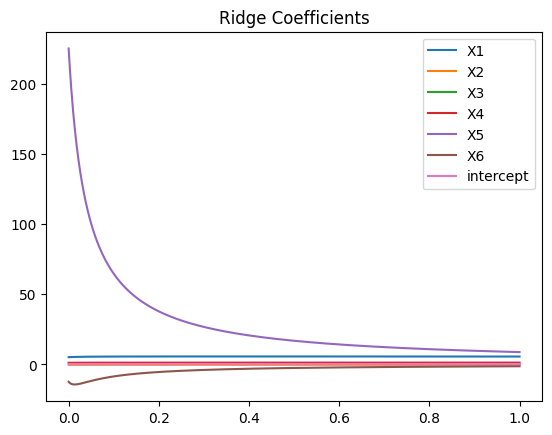

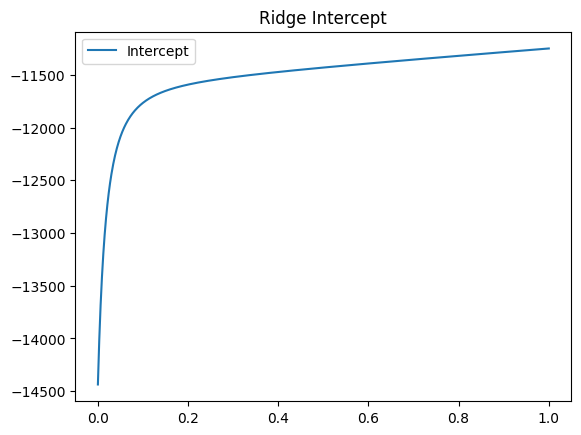

In [70]:
import pandas
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
# We will be using the sklearn library. You can learn more here:    
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


# Loading the data
data0=pandas.read_csv('Real estate.csv')
# npdata=data0.to_numpy()

# Divide the data to the variables and the label (price)
# The Ridge class does not admit an intercept (i.e. mu in the assignment) you should
# add a suitable column to your variables that will provide an extra parameter
# i.e. mu. Think what this column should be

# Now run ridge regression. Note that in the ridge classe mu is known as alpha.
#Setting alph=0 gives you the maximum likelihood solution. 
# You should try really large values of alpha to see the difference

# Separate x and y and remove the first column as it is the number of the sample
X = data0.drop('Y house price of unit area', axis=1)
X = X.drop('No', axis=1)
X['intercept'] = 1 
y = data0['Y house price of unit area']



# Run OLS regression
# Create and fit an OLS regression model
ols_model = sm.OLS(y, X).fit()
# ols_model.fit(X_train, y_train)
# print(X.columns)
print(ols_model.summary())
# Make predictions on the test data
# ols_predictions = ols_model.predict(X_test)
# Calculate the Mean Squared Error (MSE) for OLS
# ols_mse = mean_squared_error(y_test, ols_predictions)

# print(f"OLS Mean Squared Error: {ols_mse}")


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
alpha_values = np.linspace(0,1, 1000)
alpha_values = np.insert(alpha_values, 0, 0.)
ridge_models = {}
# ridge_mse = []
ridge_coefs = []
ridge_err = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    ridge_models[alpha] = ridge_model
    # y_pred = ridge_model.predict(X_test)
    # mse = mean_squared_error(y_test, y_pred)
    # ridge_mse.append(mse)
    ridge_coefs.append(ridge_model.coef_)
    ridge_err.append(ridge_model.intercept_)

print("-----------------------------------------------------------------------------------------------------------------------")
print(ridge_err[0])
plt.figure()
plt.title("Ridge Coefficients")
plt.plot(alpha_values,(ridge_coefs), label=['X1', "X2", "X3", "X4", "X5", "X6", "intercept"])
plt.legend()
plt.figure()
plt.title("Ridge Intercept")
plt.plot(alpha_values,(ridge_err), label='Intercept')
# plt.plot(alpha_values,(ridge_mse), label='MSE')
plt.legend()


d)

i) From the $\hat\theta$ we can see the most importent factor in the data as the 'X5 latitude'  as it has the largest absolute coefficient giving the highest importance and making the most impact on the data. The 'X6 longitude' is the secont most impacteful factor but not as mutch as the 'X5 latitude'

ii) The intercept $\mu$ is important as it represents the baseline price when all features are zero. Ignoring it would result in incorrect predictions.

iii) $\hat\sigma$ gives the vaiance of the data. Smaller values of $\hat\sigma$ indicate the factors have a better fit to the data.

iv) With the increase of $\lambda$ the coefficients go twords 0 and the $\hat\sigma$ decreases logarithmically. 

v)

#### 3

a)
Gaussian distribution
$$
p(x_i | \mu, R) = \frac{1}{(2\pi)^{m/2} |R|^{1/2}} \exp\left(-\frac{1}{2} (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$

Likelihood function is a product of all theeses distributions 

$$
p(\{x_i\} | R, µ) = Π p(x_i | µ, R)
$$
$$
p(\{x_i\} | R, \mu) = \frac{1}{(2\pi)^{mn/2} |R|^{n/2}} \exp\left(-\frac{1}{2} \sum_{i=1}^n (x_i - \mu)^T R^{-1} (x_i - \mu)\right)
$$

b) 
$$
p(R) ∝ e^{-λ \cdot Tr[R^{-1}]} = e^{-λ \cdot Tr[S]}
$$

$$
\text{argmax}_{µ, R} [p({xi} | µ, R) \cdot p(R)]
$$


Take the negative log of prior
$$
-\log(p(R)) = λ \cdot Tr(R^{-1})
$$


$$
-\log(p({x_i} | µ, R)) = \sum_{i=1}^N [\frac{1}{2}\cdot (x_i - µ)^T \cdot R^{-1} \cdot (x_i - µ)]
$$
Combine the prior and the likelihood function from part 3a) to give the map estimator, in log format they can be summed.
$$
\log(p({x_i} | µ, R))+\log(p(R)) =  
-\log({(2\pi)^{-mn/2} |R|^{-n/2}}) +
\sum_{i=1}^N \left[\frac{1}{2} \cdot (x_i - µ)^T \cdot \text{Tr}(R^{-1}) \cdot (x_i - µ)\right]+
\lambda \cdot \text{Tr}(R^{-1})
$$
Differentiate with respect to R to find limits. 
$$
\frac{∂}{∂R} [\log(p(R)) + \log(p({x_i} | µ, R))] = 0

$$

TODO: do the above calculation


$$
\frac{∂}{∂µ} [Σ log(p(xi | µ, R)) + log(p(R))] = 0
$$

TODO: Do this derivation too


$$
R^ = [ (1/n) Σ (x_i - µ) \cdot (x_i - µ)^T + λI ]^{-1}
$$

#### 4





In [140]:
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Read the tsv file and convert to numpy:
data=pandas.read_csv('TCGA-BRCA.tsv',sep='\t')
npdata=data.to_numpy()
data_clean=npdata[1:,2:].astype('float')


def find_genes(case:str = "b", lam:float=0.1, t:float=0.01):
    if case == "a":
        selected_genes = data_clean[:, :100]
    elif case == "b":
        gene_variances = np.var(data_clean, axis=0)
        selected_gene_indices = np.argsort(gene_variances)[-100:]
        selected_genes = data_clean[:, selected_gene_indices]
    else:
        raise ValueError("Invalid case")

    sample_covariance_matrix = np.cov(selected_genes, rowvar=False)
    I = np.zeros(sample_covariance_matrix.shape)
    np.fill_diagonal(I, lam)
    sample_covariance_matrix += I
    sample_precision_matrix = np.linalg.inv(sample_covariance_matrix)
    
    # Create Graph
    plt.figure()
    graph = nx.Graph()
    # Iterate through elements of the precision matrix and add edges if the element is larger than 't'
    n, _ = sample_precision_matrix.shape
    for i in range(n):
        for j in range(i + 1 , n):
            if abs(sample_precision_matrix[i, j]) > t:
                graph.add_edge(i, j)

    nx.draw(graph, with_labels=False, node_size=70)
    plt.title(f"Case {case}) Graph with t={t} and λ={lam}")
    plt.show()
    return np.mean(selected_genes)


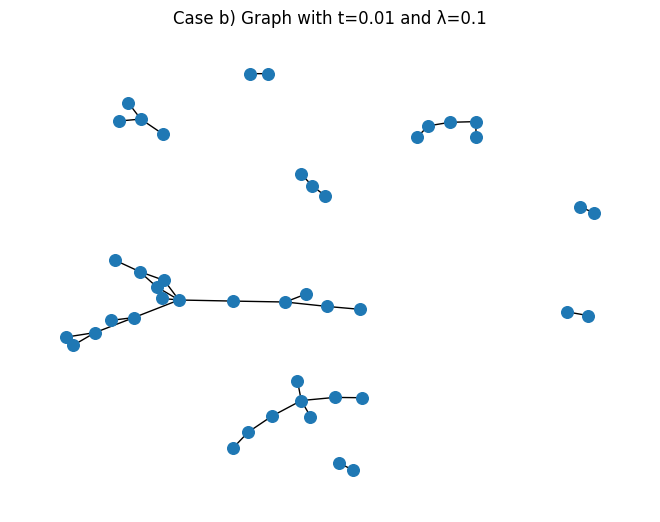

7.000421039193535

In [141]:
find_genes("b", 0.1, 0.01)

a) $\lambda$ is impacting the variance of the genes and this makes regulating the thresshold easier. Lambda can be set to 0 that will give the original variance of the genes. 

b) Selecting the threshold may involve experimentation and domain knowledge therefore for this example the threshold was selected to 0.01 to achive avoid overclustering of too many genes. 

c)

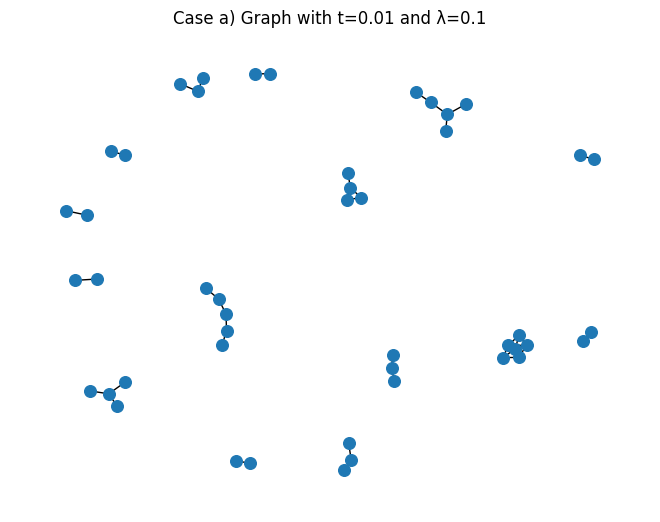

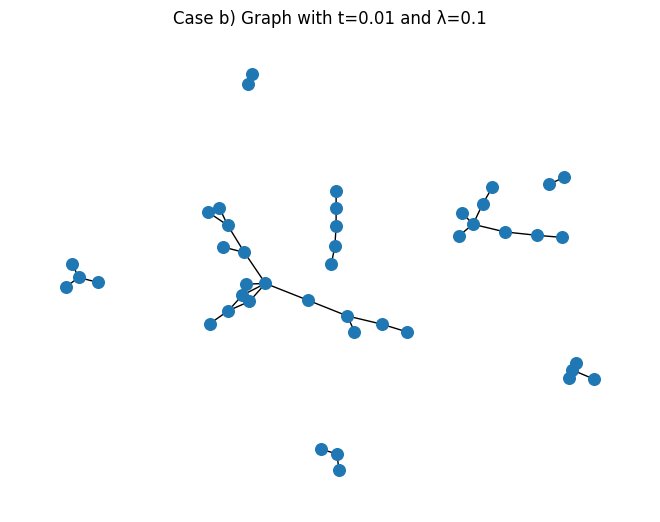

In [142]:
mu_a = find_genes("a", 0.1, 0.01)
mu_b = find_genes("b", 0.1, 0.01)

d)

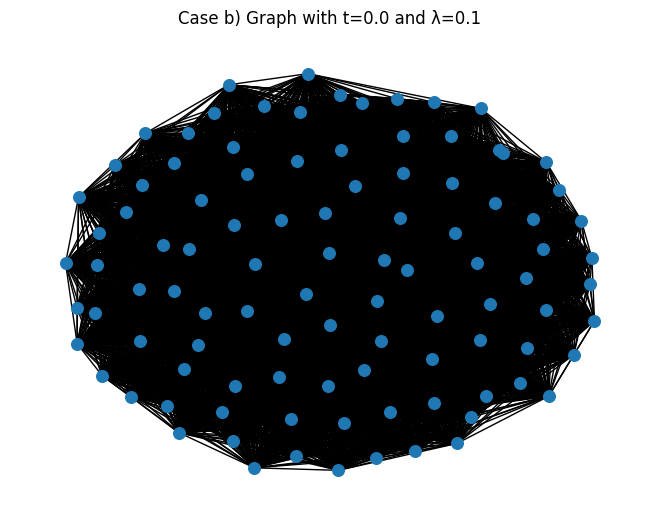

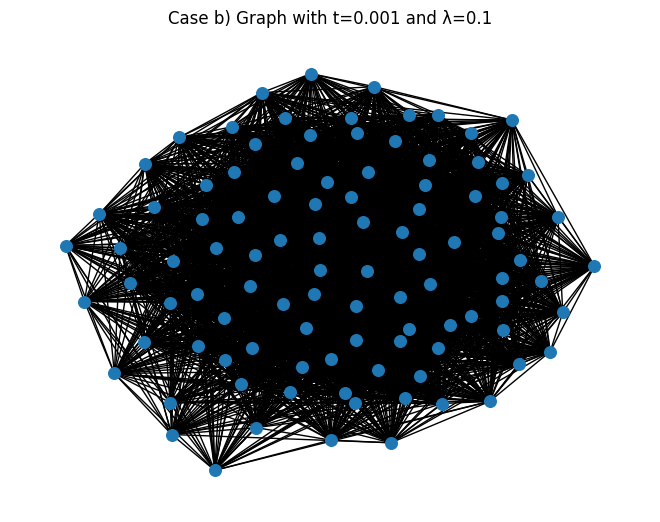

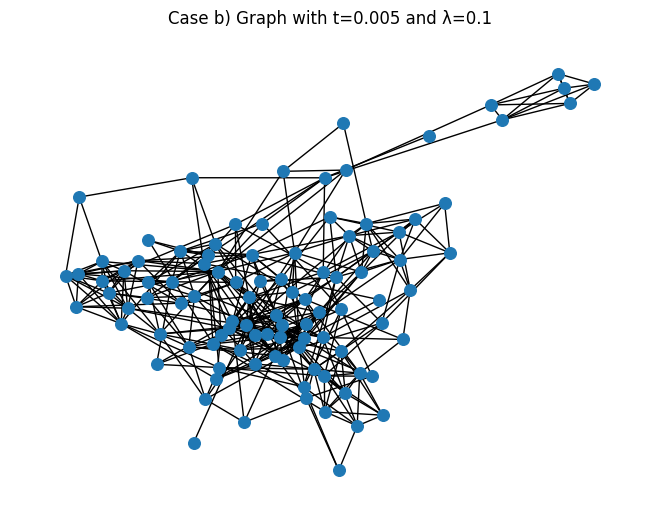

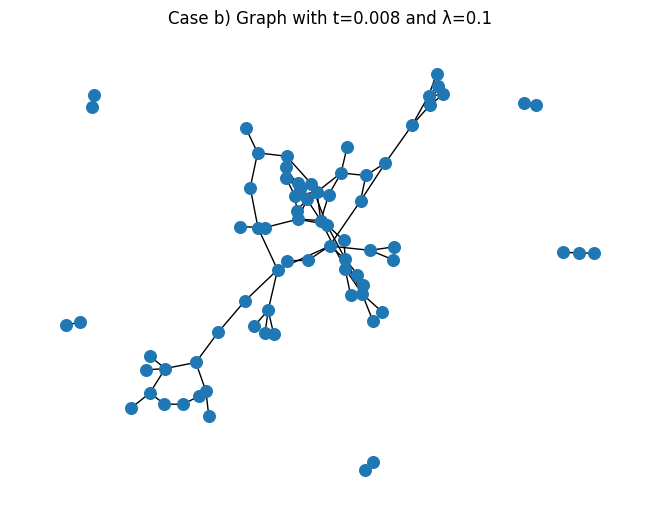

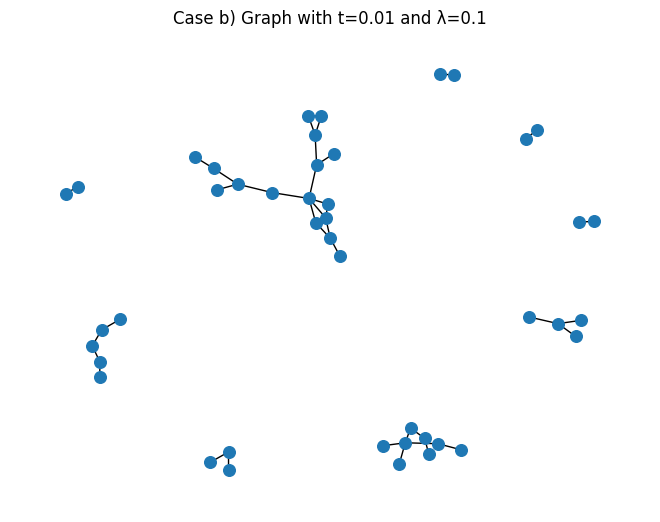

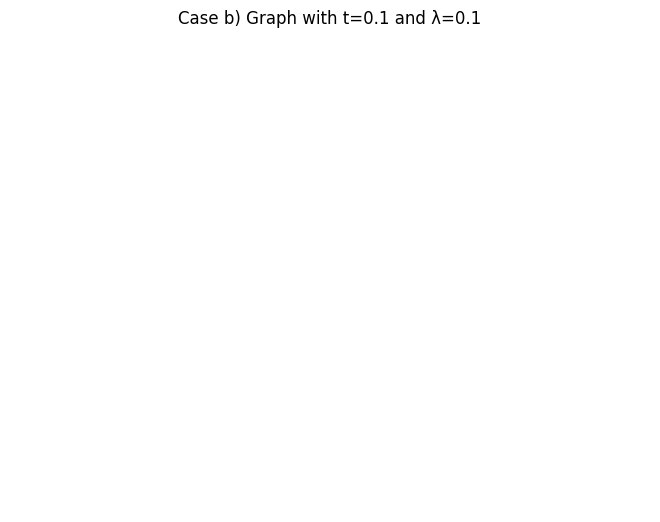

In [143]:
threshholds = [0.0, 0.001, 0.005, 0.008, 0.01, 0.1]
for t in threshholds:
    find_genes("b", 0.1, t)

e) Big value of $\mu$ means that the gene is highly expressed across the samples in the dataset. This is due the majority of genes have higher value and that can mean there is less variation. 

In [144]:
print("Mean of a:", mu_a)
print("Mean of b:", mu_b)

Mean of a: 7.3511430130956885
Mean of b: 7.000421039193535


### <center> Q2. Logistic Regression

#### 1



#### 2

a)



b)



c)



### <center> Q3

#### 1

#### 2

a)



b)